In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**4 - 2*x +1

In [3]:
integral_true = 4.4

In [4]:
# Define parameters for numerical integration
N = 10  # Number of slices
a = 0.0 # Lower bound
b = 2.0 # Upper bound
w = (b-a)/N # Step size
print("Step size ",w)

Step size  0.2


Lets define the midpoint and trapezoid methods just as we did last time.

In [27]:
def integral_midpoint(f,N,a,b):

    # Step size
    w = (b-a)/N 

    # Create an array entry for each step 
    x = np.linspace(a+w/2, b+w/2, N, endpoint = False)

    # Calculate numerical integral
    s=0 
    for k in x:
        s+= f(k)*w
    return s

In [28]:
def integral_trapezoid(f,N,a,b):

    # Step size
    w = (b-a)/N 

    # Calculate numerical integral
    #   using the extended trapezoid rule 
    x = np.arange(1, N)
    s = 0.5*f(a) + 0.5*f(b)
    for k in x:
        s+= f(a+k*w)
    s = w*s
    return s

Now lets define the Extended Simpsons method. 

Here is what we derived in class:

$I(a,b) = \frac{w}{3}[f(a)+f(b)+4\sum_{k \text{odd}}^{N-1} f(a+kw) + 2\sum_{k \text{even}}^{N-1} f(a+kw)]$

Where:
   * a = Lower Bound
   * b = Upper Bound
   * w = step width
   * N = Total number of steps (must be even)
   * k = Iteration value
   
Spend 10 minutes trying to code this in python on your own. If you want, you can scroll down and find the answer

$ $

$ $

$ $

$ $

$ $

Here is the answer:

In [29]:
def integral_simpsons(f,N,a,b):

    if N%2!=0:
        print("Please choose N even")
        raise ValueError
    
    # Step size
    w = (b-a)/N 

    # Calculate numerical integral
    #   using the extended trapezoid rule 
    
    # Add together function values at end points
    s = f(a) + f(b)
    
    # Add together function values at odd iterations
    #   with weight 4
    x = np.arange(1, N, 2)
    for k in x:
        s+= 4*f(a+k*w)
        
    # Add together function values at even iterations
    #   with weight 4
    x = np.arange(2, N, 2)
    for k in x:
        s+= 2*f(a+k*w)
    
    # Multiply all sums by step width divided by 3
    s = w*s/3
    
    return s

In [68]:
simpsons_integral(f,6,0,2)

4.403292181069957

In [52]:
def make_value_vs_N_array(integral_func):
    N_array = np.arange(2,100,2,dtype='int64')
    integral_results= []
    for N in N_array:
        integral_results.append(integral_func(f,N,a,b))
    return N_array, integral_results

In [53]:
def percent_error(a,s_true):
    return (np.array(a)-s_true)/s_true

In [54]:
N_array, mid = make_value_vs_N_array(integral_midpoint)
N_array, tra = make_value_vs_N_array(integral_trapezoid)
N_array, sim = make_value_vs_N_array(integral_simpsons)

(4.3, 4.5)

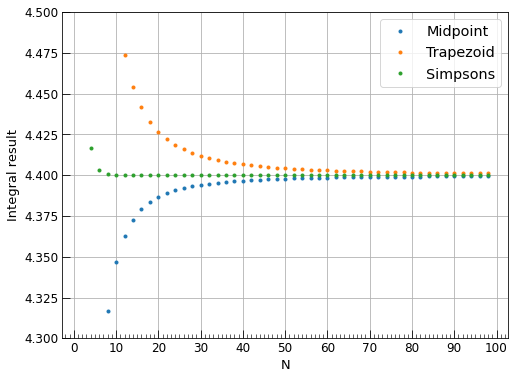

In [64]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(N_array,mid,".",label="Midpoint")
ax.plot(N_array,tra,".",label="Trapezoid")
ax.plot(N_array,sim,".",label="Simpsons")
ax.grid(True)
ax.legend(loc='upper right', fontsize='x-large')
ax.set_xlabel("N", fontsize=13)
ax.set_ylabel("Integral result", fontsize=13)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', which='major', length=8, labelsize=12,  direction = "in")
ax.tick_params(axis='both', which='minor', length=4, direction = "in")
ax.set_ylim(4.3,4.5)


In [65]:
mid_pe = percent_error(mid,integral_true)
tra_pe = percent_error(tra,integral_true)
sim_pe = percent_error(sim,integral_true)

(-0.1, 0.1)

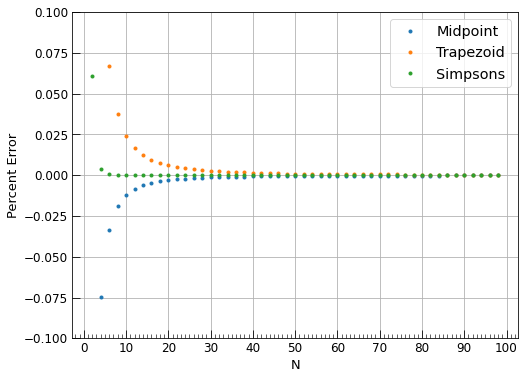

In [66]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(N_array,mid_pe,".",label="Midpoint")
ax.plot(N_array,tra_pe,".",label="Trapezoid")
ax.plot(N_array,sim_pe,".",label="Simpsons")
ax.grid(True)
ax.legend(loc='upper right', fontsize='x-large')
ax.set_xlabel("N", fontsize=13)
ax.set_ylabel("Percent Error", fontsize=13)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', which='major', length=8, labelsize=12,  direction = "in")
ax.tick_params(axis='both', which='minor', length=4, direction = "in")
ax.set_ylim(-0.1,0.1)


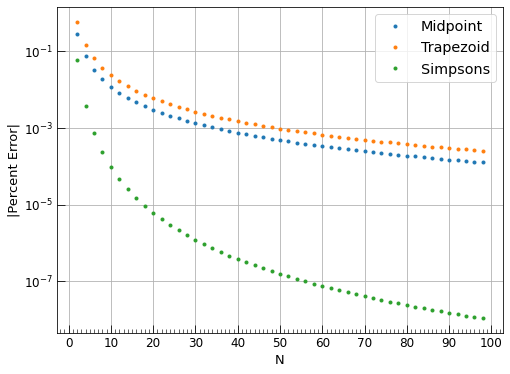

In [67]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(N_array,np.fabs(mid_pe),".",label="Midpoint")
ax.plot(N_array,np.fabs(tra_pe),".",label="Trapezoid")
ax.plot(N_array,np.fabs(sim_pe),".",label="Simpsons")
ax.grid(True)
ax.legend(loc='upper right', fontsize='x-large')
ax.set_xlabel("N", fontsize=13)
ax.set_ylabel("|Percent Error|", fontsize=13)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', which='major', length=8, labelsize=12,  direction = "in")
ax.tick_params(axis='both', which='minor', length=4, direction = "in")
plt.yscale('log')

### Gaussian Quadriture

Here are the functions provided by Mark Newman within his textbook "Computational Physics"

In [69]:
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


In [70]:
# Mark Newman
# gaussint.py

N = 3
a = 0.0
b = 2.0

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)


4.4000000000000075


In [71]:
def integral_gauss(f,N,a,b):

    # Calculate the sample points and weights, then map them
    # to the required integration domain
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    # Perform the integration
    s = 0.0
    for k in range(N):
        s += wp[k]*f(xp[k])
    
    return s

In [73]:
N_array, gau = make_value_vs_N_array(integral_gauss)
gau_pe = percent_error(gau,integral_true)

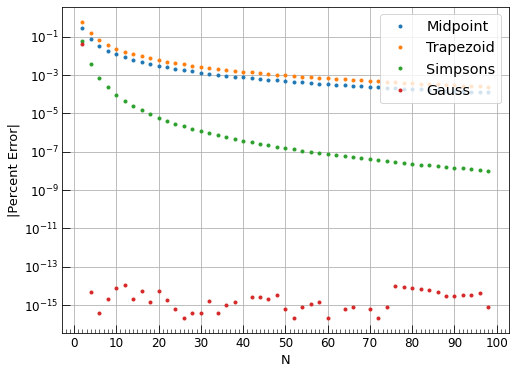

In [74]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(N_array,np.fabs(mid_pe),".",label="Midpoint")
ax.plot(N_array,np.fabs(tra_pe),".",label="Trapezoid")
ax.plot(N_array,np.fabs(sim_pe),".",label="Simpsons")
ax.plot(N_array,np.fabs(gau_pe),".",label="Gauss")
ax.grid(True)
ax.legend(loc='upper right', fontsize='x-large')
ax.set_xlabel("N", fontsize=13)
ax.set_ylabel("|Percent Error|", fontsize=13)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', which='major', length=8, labelsize=12,  direction = "in")
ax.tick_params(axis='both', which='minor', length=4, direction = "in")
plt.yscale('log')

Now that we know how to do numerical integration "by hand", we should also be aware that there are python libraries that can do this for us!

https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

```
>>> help(integrate)
 Methods for Integrating Functions given function object.

   quad          -- General purpose integration.
   dblquad       -- General purpose double integration.
   tplquad       -- General purpose triple integration.
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n.
   quadrature    -- Integrate with given tolerance using Gaussian quadrature.
   romberg       -- Integrate func using Romberg integration.

 Methods for Integrating Functions given fixed samples.

   trapezoid            -- Use trapezoidal rule to compute integral.
   cumulative_trapezoid -- Use trapezoidal rule to cumulatively compute integral.
   simpson              -- Use Simpson's rule to compute integral from samples.
   romb                 -- Use Romberg Integration to compute integral from
                        -- (2**k + 1) evenly-spaced samples.

   See the special module's orthogonal polynomials (special) for Gaussian
      quadrature roots and weights for other weighting factors and regions.

 Interface to numerical integrators of ODE systems.

   odeint        -- General integration of ordinary differential equations.
   ode           -- Integrate ODE using VODE and ZVODE routines.
```

https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

```

 scipy.integrate.quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)[source]

    Compute a definite integral.

    Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.
    
``` 

* set accuracy and tolerance with epsrel and epsabs 
   * epsrel (relative error tolerance) (fractional)
   * epsabs (absolute error tolerance)


* quad uses a FORTRAN library called quadpack
   * Uses 9 different methods and attempts to find an estimated integral within the error tolerance you requested

In [75]:
from scipy.integrate import quad

In [77]:
def f(x):
    return x**4 - 2*x +1

# Integrate function f between 0 and 2
quad(f,0,2)

(4.3999999999999995, 5.003996496050337e-14)

In [78]:
I = quad(f,0,2)
type(I)

tuple

In [79]:
result = I[0]  # element 0 is the estimated value of the integral
error  = I[1]  # upper bound on the error
print("Integral of f =",result," +- ",error)

Integral of f = 4.3999999999999995  +-  5.003996496050337e-14


In [ ]:
result, error = quad(f,0,2, trapezoid ) 

In [86]:
from scipy import integrate

I1 , E1 = integrate.quad(f,0,2)
print("Quad integral of f =",I1," +- ",E1)


Quad integral of f = 4.3999999999999995  +-  5.003996496050337e-14


In [80]:
# If you have a function with multiple paramters you can feed them to quad with args

def f2(x,a,b,c):
    return a*x**2 + b*x +c

a = 6
b = 20
c = 2

I = quad(f2,0,2, args=(a,b,c))
print(I[0])

60.00000000000001


The following may be helpful for homework 3

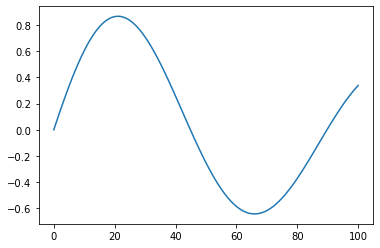

In [103]:
import numpy as np
time, velocity = np.loadtxt('http://www-personal.umich.edu/~mejn/cp/data/velocities.txt', unpack=True)

plt.plot(time,velocity)